In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('zomato.csv')

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [28]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [29]:
import seaborn as sns

In [30]:
group = df.groupby('listed_in(type)')['votes'].sum()

In [31]:
result = pd.DataFrame({'votes': group}).reset_index()

In [32]:
result.columns = ['Restaurant Type', 'Total Votes']

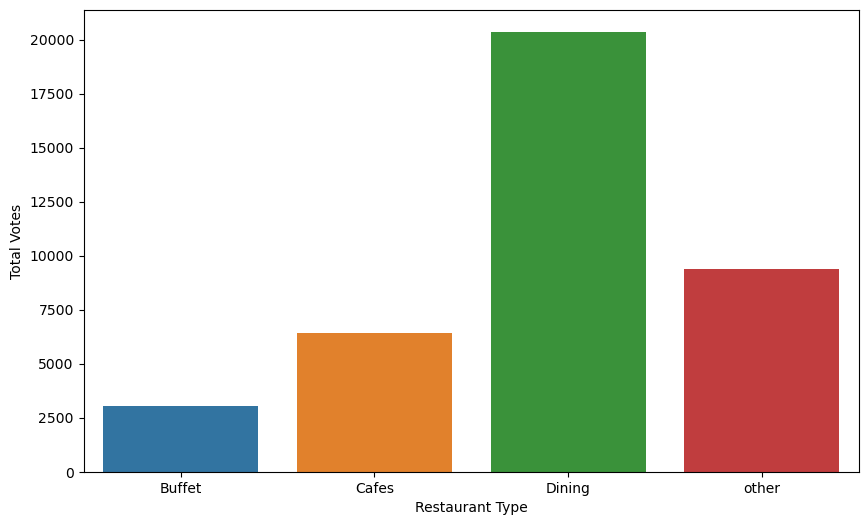

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Restaurant Type', y='Total Votes', data=result)

In [34]:
new_group = df.groupby('listed_in(type)')['approx_cost(for two people)'].sum()

In [35]:
new_result = pd.DataFrame({'approx_cost(for two people)':group}).reset_index()
new_result.columns = ['Restaurant Type_new', 'Total spend']

C:\Users\brock\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brock\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


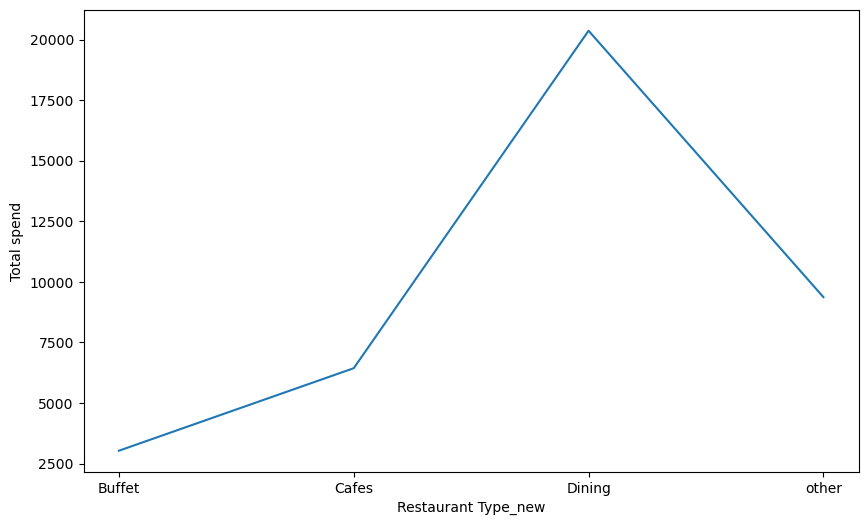

In [36]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Restaurant Type_new', y='Total spend', data=new_result)

In [37]:
new_result

,Restaurant Type_new,Total spend
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


In [38]:
result

,Restaurant Type,Total Votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


In [39]:
df['approx_cost(for two people)'].sum()

61900

In [40]:
data = df['rate']

C:\Users\brock\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


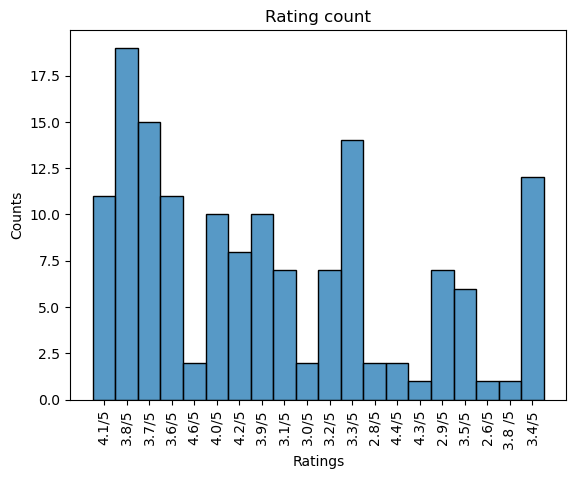

In [47]:
ax2 = sns.histplot(data, bins = 2, edgecolor = 'black')
plt.xticks(rotation=90)
plt.title('Rating count')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

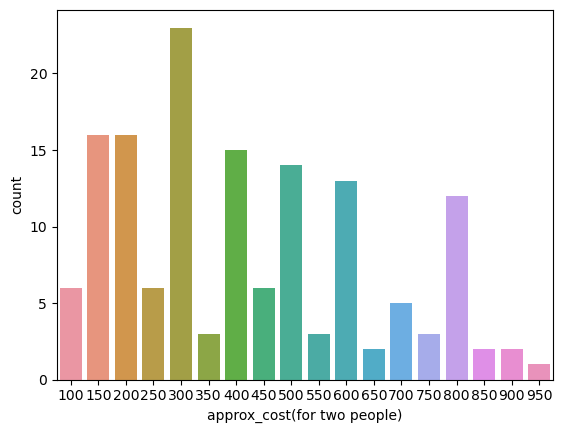

In [51]:
data2=df['approx_cost(for two people)']
ax3 = sns.countplot(x=data2)

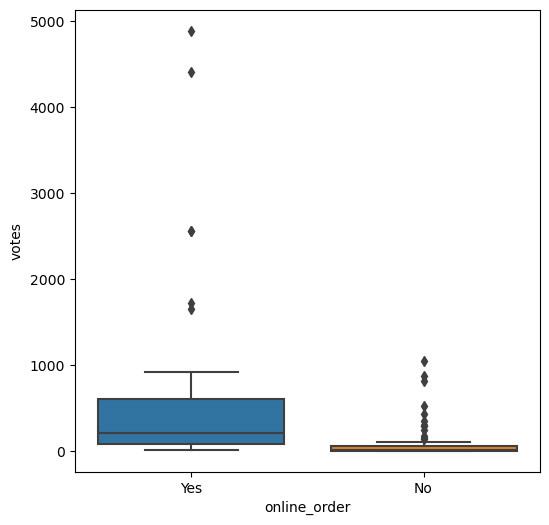

In [60]:
plt.figure(figsize=(6, 6))
ax4 = sns.boxplot(x = 'online_order', y = 'votes', data = df)

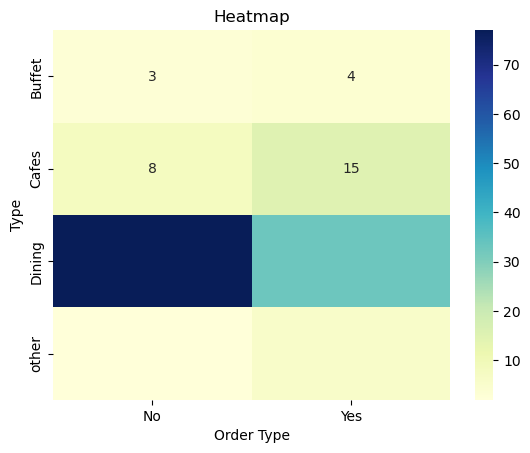

In [74]:
table = df.pivot_table(index = 'listed_in(type)', columns ='online_order' , aggfunc = 'size', fill_value = 0)
sns.heatmap(table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Heatmap')
plt.xlabel('Order Type')
plt.ylabel('Type')
plt.show()